In [1]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import ase.dft.kpoints as kpt

In [2]:
def dij(i,j):
    if i == j:
        return 1
    else:
        return 0

In [3]:
#initialize variables

a = 10.26
r = (2 * np.pi)/a * np.sqrt(11)
# r = np.sqrt(11)


rlv1 = [-2 * np.pi / a, 2 * np.pi / a, 2 * np.pi / a]
rlv2 = [2 * np.pi / a, -2 * np.pi / a, 2 * np.pi / a]
rlv3 = [2 * np.pi / a, 2 * np.pi / a, -2 * np.pi / a]


# rlv1 = [-1,1,1]
# rlv2 = [1,-1,1]
# rlv3 = [1,1,-1]


rlv1 = np.asarray(rlv1)
rlv2 = np.asarray(rlv2)
rlv3 = np.asarray(rlv3)

V = 4/3 * np.pi * r**3


In [4]:
# define all h_i points

h = []
for i in range(-3,4):
    h1 = rlv1 * i
    
    for j in range(-3,4):
        h2 = rlv2 * j
        
        for k in range(-3,4):
            h3 = rlv3 * k
            
            hv = h1 + h2 + h3
            hv = np.asarray(hv)
            if np.sqrt(np.dot(hv,hv)) <= r:
                h.append(hv)

h = np.asarray(h)
print(len(h))

51


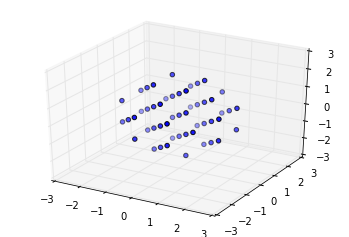

In [5]:
# plots the points described by vectors 'h' in 3d scatterplot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(h[:,0],h[:,1],h[:,2])
plt.show()

In [6]:
# print(EnergyList)
# EnergyList = np.asarray(EnergyList)
# K = [[0,0,0],
#      [0,.5,.5],
#      [1./2,1./2,1./2],
#      [1./4,3./4,1./2],
#      [1./4,5./8,5./8],
#      [3./8,3./4,3./8]]

K = [[0,0,0],
     [0,2*np.pi/a,0],
     [np.pi/a,np.pi/a,np.pi/a],
     [np.pi/a, 2*np.pi/a,0],
     [np.pi/(2*a), 2*np.pi/a, np.pi/(2*a)],
     [3*np.pi/(2*a), 3*np.pi/(2*a), 0]]

E = np.empty([len(K),len(h),len(h)],dtype=complex)

d2 = np.array([a/4,a/4,a/4])
# d2 = a/4



for kk in range(0,len(K)):
    for i in range(0,len(h)):
        for j in range(0,len(h)):
            d = dij(i,j)
            kDif = K[kk]-h[i]
            k2 = np.dot(kDif,kDif)
            
            hDif = h[i] - h[j]
            
            hDot = np.sqrt(np.dot(hDif,hDif))
            
            if hDot == 2*np.pi /a * np.sqrt(3):
                v = (-.21)

            elif hDot == 2*np.pi /a * np.sqrt(8):
                v = (.04)

            elif hDot == 2*np.pi /a * np.sqrt(11):
                v = (.08)
                
            else:
                v = 0
            
            e = k2 * d + v + np.exp(-1j * np.dot(hDif,d2)) * v
#             print(k2)
#             print(d)
#             print(hDot)
#             print(v)
#             print(np.exp(-1j * (hDot) * d2))
#             print(e)
            E[kk,i,j] = e 
# print(np.linalg.eig(E[0]))
# print(E[0])

# Test if E[i] is symmetric and Hermitian
    np.allclose(E[kk], E[kk].T, atol=1.0e-8)
    ETran = E[kk].T
    ETranConj =  np.conj(ETran)
#     ETranConj = np.asarray(ETranConj)
#     print(np.allclose(E[kk],ETranConj,1.e-8))
#     print(type(E[kk]))
#     print(E[kk])
#     print(ETranConj)
#     print(type(ETranConj))
#     print("--------------------------www-----------------------------")
    
    
    


In [7]:
EignValVec = []

for i in E:
    EignValVec.append(np.linalg.eigh(i))

In [8]:
EignVal = []
EignVec = []

for i in EignValVec:
    
#     print(i[0])
    EignVal.append(i[0])
    EignVec.append(i[1])


In [9]:
# for i in range(0,len(EignValVec[i])):
#     print(EignValVec[i][0])
    

In [10]:
# print(EignVal)

In [11]:
# High-symmetry points in the Brillouin zone
points = kpt.ibz_points['fcc']
G = points['Gamma']
X = points['X']
XN = np.array([0.5, 0.5, 1.0])
W = points['W']
K = points['K']
L = points['L']
U = points['U']

point_names = ['$\Gamma$', 'K', 'X', 'W', "X'", '$\Gamma$', 'L']
# path = [G, K, XN, W, X, G, L]
path = [W, G, X, W, L, G]



# This code is from Conrad Rosenbrock

In [12]:
# N = 11
# x1 = np.linspace(0, 4, N, endpoint=True)
# k_x = np.linspace(0, 4, N, endpoint=True)
# k_y = np.linspace(0, 4, N, endpoint=True)
# k_z = np.linspace(0, 4, N, endpoint=True)
# for n in range(0, N):
#     if (x1[n] >= 0) & (x1[n] < 1):
#         k_x[n] = math.pi/a*(1 - x1[n])
#         k_y[n] = math.pi/a*(1 - x1[n])
#         k_z[n] = math.pi/a*(1 - x1[n])
#     elif (x1[n] >= 1) & (x1[n] < 2):
#         k_x[n] = 0
#         k_y[n] = 2*math.pi/a*(x1[n] - 1)
#         k_z[n] = 0
#     elif (x1[n] >= 2) & (x1[n] < 3):
#         k_x[n] = math.pi/(2*a)*(x1[n] - 2)
#         k_y[n] = 2*math.pi/a
#         k_z[n] = math.pi/(2*a)*(x1[n] - 2)
#     elif (x1[n] >= 3) & (x1[n] <= 4):
#         k_x[n] = 3*math.pi/(2*a)*(x1[n] - 8/3)
#         k_y[n] = 2*math.pi/a
#         k_z[n] = 3*math.pi/(2*a)*(x1[n] - 8/3)
#     else:
#         k_x[n] = 0
#         k_y[n] = 0
#         k_z[n] = 0
        
# This section of code by Kacey Leavitt

In [13]:
# print(W)
cell = [rlv1,rlv2,rlv3]
cell = [[-1,1,1],[1,-1,1],[1,1,-1]]


from ase import Atoms
Npts = 100


path_kc, q, Q = kpt.get_bandpath(path, cell, Npts)
print(path_kc)

[[ 0.5         0.25        0.75      ]
 [ 0.48333333  0.24166667  0.725     ]
 [ 0.46666667  0.23333333  0.7       ]
 [ 0.45        0.225       0.675     ]
 [ 0.43333333  0.21666667  0.65      ]
 [ 0.41666667  0.20833333  0.625     ]
 [ 0.4         0.2         0.6       ]
 [ 0.38333333  0.19166667  0.575     ]
 [ 0.36666667  0.18333333  0.55      ]
 [ 0.35        0.175       0.525     ]
 [ 0.33333333  0.16666667  0.5       ]
 [ 0.31666667  0.15833333  0.475     ]
 [ 0.3         0.15        0.45      ]
 [ 0.28333333  0.14166667  0.425     ]
 [ 0.26666667  0.13333333  0.4       ]
 [ 0.25        0.125       0.375     ]
 [ 0.23333333  0.11666667  0.35      ]
 [ 0.21666667  0.10833333  0.325     ]
 [ 0.2         0.1         0.3       ]
 [ 0.18333333  0.09166667  0.275     ]
 [ 0.16666667  0.08333333  0.25      ]
 [ 0.15        0.075       0.225     ]
 [ 0.13333333  0.06666667  0.2       ]
 [ 0.11666667  0.05833333  0.175     ]
 [ 0.1         0.05        0.15      ]
 [ 0.08333333  0.04166667

In [14]:
K = path_kc * 2 * np.pi / a

E = np.empty([len(K),len(h),len(h)],dtype=complex)

d2 = np.array([a/4,a/4,a/4])
# d2 = a/4



for kk in range(0,len(K)):
    for i in range(0,len(h)):
        for j in range(0,len(h)):
            d = dij(i,j)
            kDif = K[kk]-h[i]
            k2 = np.dot(kDif,kDif)
            
            hDif = h[i] - h[j]
            
            hDot = np.sqrt(np.dot(hDif,hDif))
            
            if hDot == 2*np.pi /a * np.sqrt(3):
                v = (-.21)

            elif hDot == 2*np.pi /a * np.sqrt(8):
                v = (.04)

            elif hDot == 2*np.pi /a * np.sqrt(11):
                v = (.08)
                
            else:
                v = 0
            
            e = k2 * d + v + np.exp(-1j * np.dot(hDif,d2)) * v

            E[kk,i,j] = e 

            
    ETran2 = E[kk].T
    ETranConj2 =  np.conj(ETran2)
#     if np.allclose(E[kk],ETranConj2,1.e-8) == True:
#         print("no")


In [15]:
EignValVec2 = []
for i in E:
    EignValVec2.append(np.linalg.eigh(i))
#     print(1)
#     EignVal2, EignVec2 = np.linalg.eigh(i)
EignVal2 = []
EignVec2 = []

for i in EignValVec2:
#     print(2)
    
    EignVal2.append(i[0])
    EignVec2.append(i[1])



In [16]:
print(np.size(EignVal2))

5100


In [17]:
zipEig = np.asarray(zip(*EignVal2))
print(np.size(zipEig))

5100


In [18]:
print(len(zipEig[1]))

100


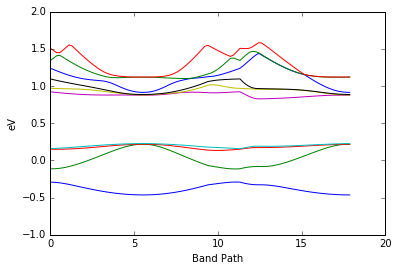

In [19]:
for eV in zipEig[:10]:
#     print(eV)
    
    plt.plot(q,eV)
plt.xlabel("Band Path")
plt.axis([0.,20.,-1.,2])
plt.ylabel("eV")
plt.show()